# Experiement: Round Three | 29%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_29.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  20431  16672       1     155    60.0    140    100            1     1   
1  30756  20278       1     165    65.0    120     80            3     3   
2   3416  15166       1     158    98.0     90     60            1     1   
3  74688  20939       1     159    83.0    140   1008            1     1   
4  53855  22443       2     169    76.0    140     90            1     3   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       0       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       0       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49079 entries, 0 to 49078
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49079 non-null  int64  
 1   age          49079 non-null  int64  
 2   gender       49079 non-null  int64  
 3   height       49079 non-null  int64  
 4   weight       49079 non-null  float64
 5   ap_hi        49079 non-null  int64  
 6   ap_lo        49079 non-null  int64  
 7   cholesterol  49079 non-null  int64  
 8   gluc         49079 non-null  int64  
 9   smoke        49079 non-null  int64  
 10  alco         49079 non-null  int64  
 11  active       49079 non-null  int64  
 12  cardio       49079 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.9 MB


0    34679
1    14400
Name: cardio, dtype: int64

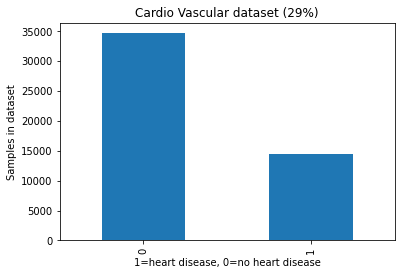

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (29%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

The balance ratio is (27500/62179=0,2934045111) approximately 29%.

# Train/Test split 

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

# Logistic Regression with raw dataset

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84     27743
           1       0.67      0.24      0.35     11520

    accuracy                           0.74     39263
   macro avg       0.71      0.59      0.60     39263
weighted avg       0.73      0.74      0.70     39263



In [6]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      6936
           1       0.63      0.24      0.34      2880

    accuracy                           0.74      9816
   macro avg       0.69      0.59      0.59      9816
weighted avg       0.71      0.74      0.69      9816



In [7]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.751


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.737


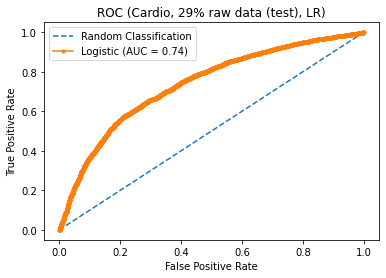

In [8]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85     27743
           1       0.70      0.42      0.53     11520

    accuracy                           0.78     39263
   macro avg       0.75      0.67      0.69     39263
weighted avg       0.77      0.78      0.76     39263



In [10]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6936
           1       0.65      0.39      0.49      2880

    accuracy                           0.76      9816
   macro avg       0.72      0.65      0.67      9816
weighted avg       0.74      0.76      0.74      9816



In [11]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.788


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.764


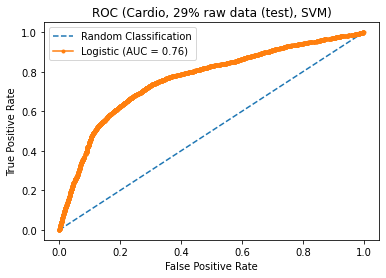

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost wit raw data

In [13]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [14]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.21274	validation_0-logloss:0.65784	validation_1-error:0.22086	validation_1-logloss:0.65895
[1]	validation_0-error:0.21292	validation_0-logloss:0.62897	validation_1-error:0.22107	validation_1-logloss:0.63102
[2]	validation_0-error:0.21193	validation_0-logloss:0.60529	validation_1-error:0.22107	validation_1-logloss:0.60829
[3]	validation_0-error:0.21257	validation_0-logloss:0.58549	validation_1-error:0.22117	validation_1-logloss:0.58936
[4]	validation_0-error:0.21160	validation_0-logloss:0.56903	validation_1-error:0.22127	validation_1-logloss:0.57364
[5]	validation_0-error:0.21277	validation_0-logloss:0.55505	validation_1-error:0.22137	validation_1-logloss:0.56037
[6]	validation_0-error:0.21198	validation_0-logloss:0.54313	validation_1-error:0.22127	validation_1-logloss:0.54920
[7]	validation_0-error:0.21185	validation_0-logloss:0.53314	validation_1-error:0.22107	validation_1-logloss:0.53972
[8]	validation_0-error:0.21201	validation_0-logloss:0.52463	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     27743
           1       0.68      0.53      0.59     11520

    accuracy                           0.79     39263
   macro avg       0.75      0.71      0.73     39263
weighted avg       0.78      0.79      0.78     39263



In [16]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6936
           1       0.66      0.51      0.57      2880

    accuracy                           0.78      9816
   macro avg       0.74      0.70      0.71      9816
weighted avg       0.77      0.78      0.77      9816



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.810


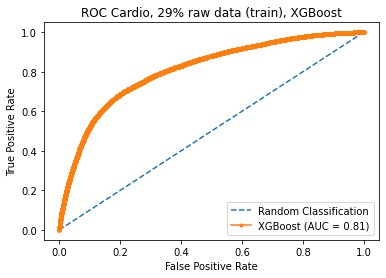

In [17]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.789


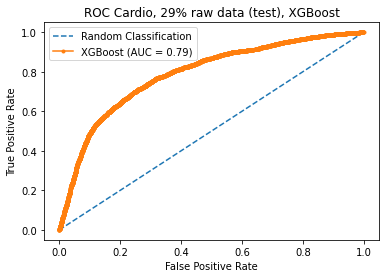

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data Augmentation 

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [19]:
df_train = X_train
df_train['cardio'] = y_train

In [20]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
450    63119  21314       2     171   137.0    170    100            1     1   
14949   2511  16009       1     155    66.0    100     70            1     1   
44247  86028  21923       1     184    76.0    110     80            1     1   
35744  61912  16095       1     163    68.0    120     80            1     1   
39392  72168  17294       2     164    73.0    120     80            1     1   

       smoke  alco  active  cardio  
450        0     0       0       1  
14949      0     0       1       0  
44247      0     0       1       0  
35744      0     0       0       0  
39392      0     0       1       0

1    27743
0    27743
Name: cardio, dtype: int64

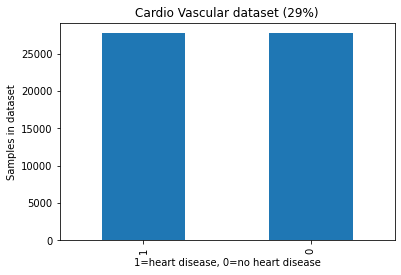

In [21]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (29%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [22]:
X_train = df_oversampler
y_train = df_oversampler_y

# Logistic Regression with data from SMOTE

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72     27743
           1       0.73      0.69      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [24]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      6936
           1       0.50      0.64      0.56      2880

    accuracy                           0.71      9816
   macro avg       0.67      0.69      0.67      9816
weighted avg       0.73      0.71      0.72      9816



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774


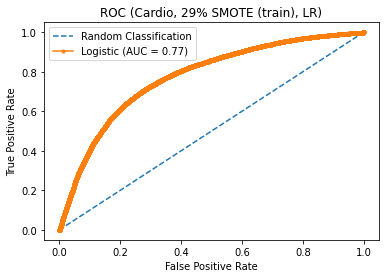

In [25]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.744


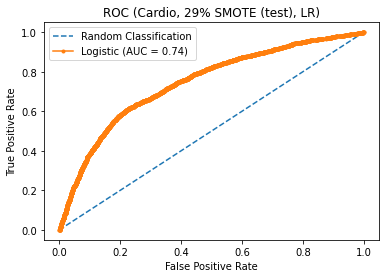

In [26]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with SMOTE data

In [27]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     27743
           1       0.77      0.74      0.75     27743

    accuracy                           0.76     55486
   macro avg       0.76      0.76      0.76     55486
weighted avg       0.76      0.76      0.76     55486



In [28]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      6936
           1       0.53      0.64      0.58      2880

    accuracy                           0.73      9816
   macro avg       0.68      0.70      0.69      9816
weighted avg       0.75      0.73      0.73      9816



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.826


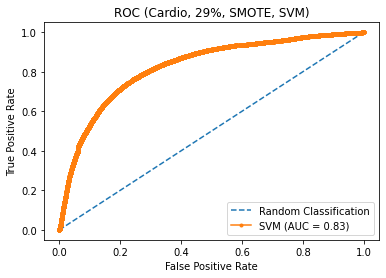

In [29]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.762


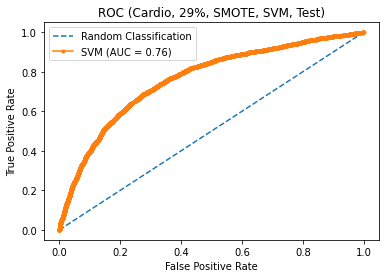

In [30]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with SMOTE data

In [31]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.21892	validation_0-logloss:0.65750	validation_1-error:0.23645	validation_1-logloss:0.66521
[1]	validation_0-error:0.21573	validation_0-logloss:0.62785	validation_1-error:0.23777	validation_1-logloss:0.64217
[2]	validation_0-error:0.21436	validation_0-logloss:0.60344	validation_1-error:0.24226	validation_1-logloss:0.62317
[3]	validation_0-error:0.21568	validation_0-logloss:0.58397	validation_1-error:0.23594	validation_1-logloss:0.60825
[4]	validation_0-error:0.21766	validation_0-logloss:0.56676	validation_1-error:0.23227	validation_1-logloss:0.59525
[5]	validation_0-error:0.21697	validation_0-logloss:0.55270	validation_1-error:0.23289	validation_1-logloss:0.58427
[6]	validation_0-error:0.21418	validation_0-logloss:0.54072	validation_1-error:0.23217	validation_1-logloss:0.57534
[7]	validation_0-error:0.21396	validation_0-logloss:0.52930	validation_1-error:0.23462	validation_1-logloss:0.56775
[8]	validation_0-error:0.21377	validation_0-logloss:0.52002	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     27743
           1       0.83      0.77      0.80     27743

    accuracy                           0.81     55486
   macro avg       0.81      0.81      0.81     55486
weighted avg       0.81      0.81      0.81     55486



In [33]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      6936
           1       0.60      0.57      0.58      2880

    accuracy                           0.76      9816
   macro avg       0.71      0.71      0.71      9816
weighted avg       0.76      0.76      0.76      9816



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.887


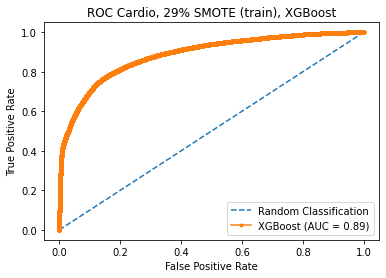

In [34]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.780


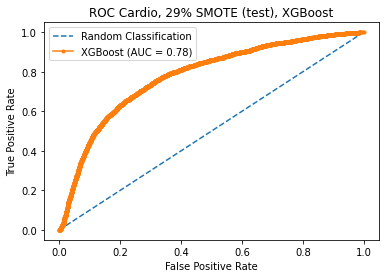

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation with TVAE

In [36]:
df_train['cardio'].value_counts()

0    27743
1    11520
Name: cardio, dtype: int64

In [37]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1    12032
Name: cardio, dtype: int64

In [38]:
df_train_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
df_train_1['cardio'].value_counts()

1    12032
Name: cardio, dtype: int64

In [39]:
df_train_0 = df_train[df_train['cardio'] == 0]
df_train_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [40]:
train_df_0_sm = df_train_0.sample(n = 13000)
train_df_sm = train_df_0_sm.append(df_train_1)

In [41]:
tvae = TVAE()

tvae.fit(train_df_sm)
# Once trained generate samples
samples = tvae.sample(11000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_sm,samples])
tvae_result_df['cardio'].value_counts()

1    16993
0    13000
Name: cardio, dtype: int64

In [42]:
df_train_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
df_train_1['cardio'].value_counts()

1    16993
Name: cardio, dtype: int64

In [43]:
train_df_0_med = df_train_0.sample(n = 17000)
train_df_med = train_df_0_med.append(df_train_1)

In [44]:
train_df_med['cardio'].value_counts()

0    17000
1    16993
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(train_df_med)
# Once trained generate samples
samples = tvae.sample(16000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_med,samples])
tvae_result_df['cardio'].value_counts()

1    24239
0    17000
Name: cardio, dtype: int64

In [46]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
train_df_large = df_train_0.append(tvae_result_df_1)
train_df_large['cardio'].value_counts()

0    27743
1    24239
Name: cardio, dtype: int64

In [47]:
tvae = TVAE()

tvae.fit(train_df_large)
# Once trained generate samples
samples = tvae.sample(22000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_large,samples])
tvae_result_df['cardio'].value_counts()

1    34526
0    27743
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(23000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

1    41884
0    27743
Name: cardio, dtype: int64

In [49]:
tvae_result_df_1 = tvae_result_df1[tvae_result_df1['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    41884
Name: cardio, dtype: int64

In [50]:
tvae_result_df_0 = tvae_result_df1[tvae_result_df1['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [51]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

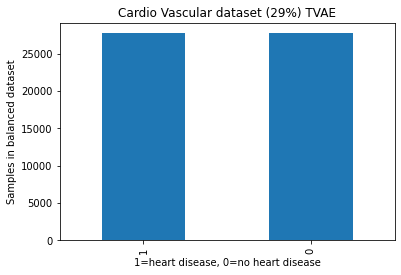

In [52]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (29%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [53]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

# Logistic Regression with TVAE data

In [54]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     27743
           1       0.66      0.66      0.66     27743

    accuracy                           0.66     55486
   macro avg       0.66      0.66      0.66     55486
weighted avg       0.66      0.66      0.66     55486



In [55]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71      6936
           1       0.39      0.55      0.46      2880

    accuracy                           0.62      9816
   macro avg       0.58      0.60      0.58      9816
weighted avg       0.66      0.62      0.63      9816



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722


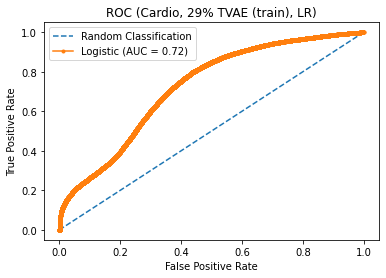

In [56]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.638


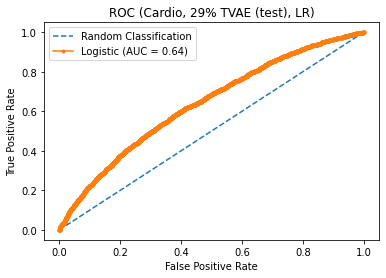

In [57]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with TVAE data

In [58]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86     27743
           1       0.94      0.73      0.83     27743

    accuracy                           0.84     55486
   macro avg       0.86      0.84      0.84     55486
weighted avg       0.86      0.84      0.84     55486



In [59]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      6936
           1       0.61      0.19      0.29      2880

    accuracy                           0.73      9816
   macro avg       0.67      0.57      0.56      9816
weighted avg       0.70      0.73      0.67      9816



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.924


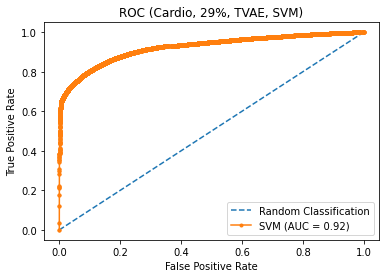

In [60]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.735


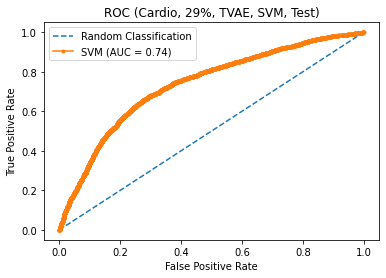

In [61]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with TVAE data

In [62]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17824	validation_0-logloss:0.64619	validation_1-error:0.25774	validation_1-logloss:0.66759
[1]	validation_0-error:0.17824	validation_0-logloss:0.60771	validation_1-error:0.25774	validation_1-logloss:0.64611
[2]	validation_0-error:0.17824	validation_0-logloss:0.57576	validation_1-error:0.25774	validation_1-logloss:0.62928
[3]	validation_0-error:0.17824	validation_0-logloss:0.54911	validation_1-error:0.25774	validation_1-logloss:0.61553
[4]	validation_0-error:0.17824	validation_0-logloss:0.52653	validation_1-error:0.25774	validation_1-logloss:0.60157
[5]	validation_0-error:0.16130	validation_0-logloss:0.50671	validation_1-error:0.24368	validation_1-logloss:0.58973
[6]	validation_0-error:0.16130	validation_0-logloss:0.48981	validation_1-error:0.24368	validation_1-logloss:0.58190
[7]	validation_0-error:0.16130	validation_0-logloss:0.47505	validation_1-error:0.24368	validation_1-logloss:0.57319
[8]	validation_0-error:0.16130	validation_0-logloss:0.46155	validation_1

[71]	validation_0-error:0.13023	validation_0-logloss:0.29951	validation_1-error:0.23655	validation_1-logloss:0.50958
[72]	validation_0-error:0.12893	validation_0-logloss:0.29792	validation_1-error:0.23614	validation_1-logloss:0.50962
[73]	validation_0-error:0.12890	validation_0-logloss:0.29756	validation_1-error:0.23564	validation_1-logloss:0.50941
[74]	validation_0-error:0.12854	validation_0-logloss:0.29708	validation_1-error:0.23492	validation_1-logloss:0.50906
[75]	validation_0-error:0.12854	validation_0-logloss:0.29693	validation_1-error:0.23502	validation_1-logloss:0.50909
[76]	validation_0-error:0.12846	validation_0-logloss:0.29664	validation_1-error:0.23513	validation_1-logloss:0.50887
[77]	validation_0-error:0.12837	validation_0-logloss:0.29612	validation_1-error:0.23462	validation_1-logloss:0.50891
[78]	validation_0-error:0.12825	validation_0-logloss:0.29574	validation_1-error:0.23441	validation_1-logloss:0.50881
[79]	validation_0-error:0.12814	validation_0-logloss:0.29551	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     27743
           1       0.91      0.83      0.87     27743

    accuracy                           0.87     55486
   macro avg       0.88      0.87      0.87     55486
weighted avg       0.88      0.87      0.87     55486



In [64]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      6936
           1       0.66      0.42      0.52      2880

    accuracy                           0.77      9816
   macro avg       0.72      0.67      0.68      9816
weighted avg       0.75      0.77      0.75      9816



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.941


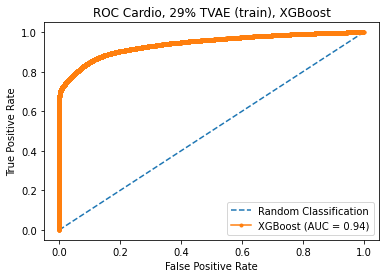

In [65]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.773


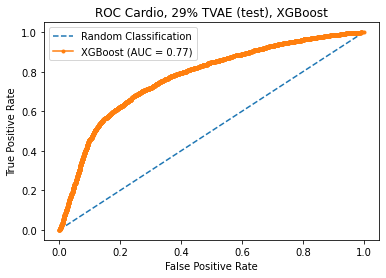

In [66]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# CTGAN to balance the training dataframe

In [67]:
df_train_0 = df_train[df_train['cardio'] == 0]
train_df_0_sm = df_train_0.sample(n = 15000)

In [68]:
df_train_1 = df_train[df_train['cardio'] == 1]
df_train_1['cardio'].value_counts()

1    11520
Name: cardio, dtype: int64

In [69]:
train_df_sm = df_train_1.append(train_df_0_sm)
train_df_sm['cardio'].value_counts()

0    15000
1    11520
Name: cardio, dtype: int64

In [70]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(11000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    6682
Name: cardio, dtype: int64

In [71]:
train_df_sm = train_df_sm.append(samples)

In [72]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(5000)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    3487
Name: cardio, dtype: int64

In [73]:
train_df_0_med = df_train_0.sample(n = 20000)
df_train_1 = train_df_sm[train_df_sm['cardio'] == 1]
df_train_1 = df_train_1.append(samples1)
train_df_med = train_df_0_med.append(df_train_1)
train_df_med['cardio'].value_counts()

1    21689
0    20000
Name: cardio, dtype: int64

In [74]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(15000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    9891
Name: cardio, dtype: int64

In [75]:
train_df_lg = samples2.append(train_df_med)
train_df_lg['cardio'].value_counts()

1    31580
0    20000
Name: cardio, dtype: int64

In [76]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_lg, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(15000)
samples3 = samples3[samples3['cardio'] ==1.0]
samples3['cardio'].value_counts()

1    8609
Name: cardio, dtype: int64

In [77]:
train_df_all = samples3.append(train_df_lg)
train_df_all_1 = train_df_all[train_df_all['cardio'] == 1]
train_df_1_bal = train_df_all_1.sample(n = 27743)
df_train_bal = train_df_1_bal.append(df_train_0)
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [78]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

# Logistic Regression with CTGAN data

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68     27743
           1       0.69      0.62      0.65     27743

    accuracy                           0.67     55486
   macro avg       0.67      0.67      0.67     55486
weighted avg       0.67      0.67      0.67     55486



In [80]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      6936
           1       0.48      0.66      0.56      2880

    accuracy                           0.69      9816
   macro avg       0.66      0.68      0.66      9816
weighted avg       0.73      0.69      0.70      9816



In [81]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.710


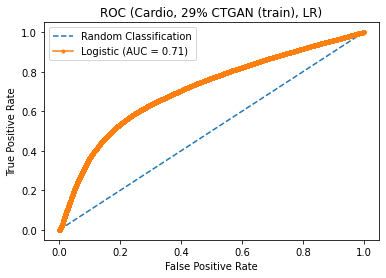

In [82]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.737


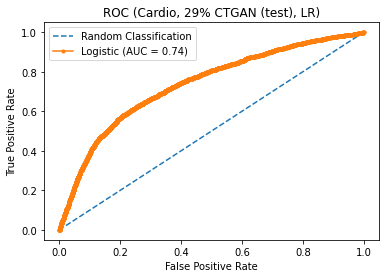

In [83]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with CTGAN data

In [84]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     27743
           1       0.74      0.70      0.72     27743

    accuracy                           0.73     55486
   macro avg       0.73      0.73      0.73     55486
weighted avg       0.73      0.73      0.73     55486



In [85]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      6936
           1       0.52      0.64      0.57      2880

    accuracy                           0.72      9816
   macro avg       0.68      0.70      0.68      9816
weighted avg       0.74      0.72      0.73      9816



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.789


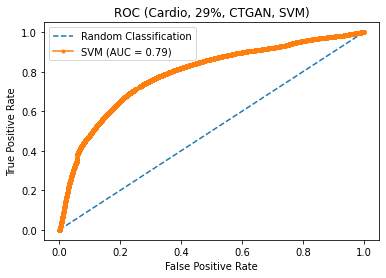

In [86]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.743


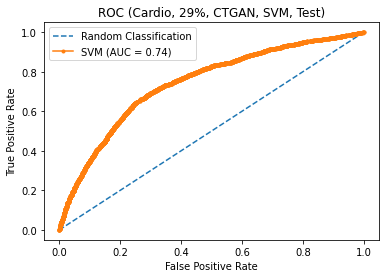

In [87]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 29%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with CTGAN data

In [88]:

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.24853	validation_0-logloss:0.66415	validation_1-error:0.24236	validation_1-logloss:0.67154
[1]	validation_0-error:0.25262	validation_0-logloss:0.64056	validation_1-error:0.26416	validation_1-logloss:0.65370
[2]	validation_0-error:0.25262	validation_0-logloss:0.62091	validation_1-error:0.26416	validation_1-logloss:0.63868
[3]	validation_0-error:0.22279	validation_0-logloss:0.59154	validation_1-error:0.23360	validation_1-logloss:0.62030
[4]	validation_0-error:0.18082	validation_0-logloss:0.56679	validation_1-error:0.23645	validation_1-logloss:0.60501
[5]	validation_0-error:0.18068	validation_0-logloss:0.54658	validation_1-error:0.23594	validation_1-logloss:0.59261
[6]	validation_0-error:0.18143	validation_0-logloss:0.52909	validation_1-error:0.23553	validation_1-logloss:0.58237
[7]	validation_0-error:0.18046	validation_0-logloss:0.52008	validation_1-error:0.23584	validation_1-logloss:0.57615
[8]	validation_0-error:0.17976	validation_0-logloss:0.50909	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     27743
           1       0.87      0.82      0.84     27743

    accuracy                           0.85     55486
   macro avg       0.85      0.85      0.85     55486
weighted avg       0.85      0.85      0.85     55486



In [90]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      6936
           1       0.63      0.50      0.56      2880

    accuracy                           0.77      9816
   macro avg       0.72      0.69      0.70      9816
weighted avg       0.76      0.77      0.76      9816



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.918


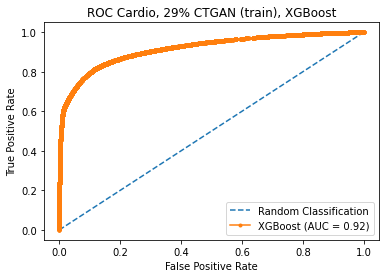

In [91]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.766


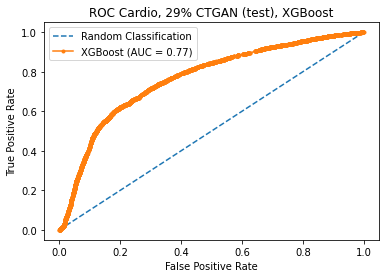

In [92]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 29% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()